In [98]:
#import statements

import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#pd for handling csv data, sm for linear regression modeling, matplotlib for plotting results
#ignoring warnings for tidier plotting

In [99]:
#pull in TSLA stock price data as a dataframe and display the first few rows

df = pd.read_csv("TSLA_stock_prices_ytd.csv")
df.head()

#"Day number" is a numeric representation of the date for easy data manipulation
#(days that the stock market isn't open aren't counted here)

,Date,Day number,Open,High,Low,Close,Adj Close,Volume
0,3-Jan-22,1,1147.75,1201.07,1136.04,1199.78,1199.78,34643800.0
1,4-Jan-22,2,1189.55,1208.00,1123.05,1149.59,1149.59,33416100.0
2,5-Jan-22,3,1146.65,1170.34,1081.01,1088.12,1088.12,26706600.0
3,6-Jan-22,4,1077.00,1088.00,1020.50,1064.70,1064.70,30112200.0
4,7-Jan-22,5,1080.37,1080.93,1010.00,1026.96,1026.96,28054900.0


In [100]:
#check the data types for each column 

df.dtypes

Date           object
Day number      int64
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume        float64
dtype: object

In [101]:
#define x and y for input into the linear regression formula

x = df[["Day number"]]
y = df[["Close"]]

In [102]:
#if you want your trendline to go through the origin (x=0, y=0), you don't need to include this line

x = sm.add_constant(x) 

#TSLA's stock price was not $0/share on day 1 in this dataset (x=1, y=1199.78), so we need to include this 
#the add_constant() function ensures that the OLS() function calculates values for a constant (b) in the trendline


In [103]:
#fit the model and print a summary of the results

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     59.60
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           5.27e-12
Time:                        12:14:28   Log-Likelihood:                -693.64
No. Observations:                 114   AIC:                             1391.
Df Residuals:                     112   BIC:                             1397.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1028.0436     20.209     50.871      0.0

In [104]:
#pull out the constant (b) and coefficient(m) values for easy reference

model.params

const         1028.043636
Day number      -2.354925
dtype: float64

In [82]:
#calculate the predicted values for the trendline

y_pred = model.predict(x)
print(y_pred)

#y_pred is a pandas data series

0      1025.688711
1      1023.333786
2      1020.978861
3      1018.623935
4      1016.269010
          ...     
109     769.001867
110     766.646942
111     764.292017
112     761.937091
113     759.582166
Length: 114, dtype: float64


In [83]:
#add y_pred back to your initial dataset for easy comparison

df["Close_Pred"] = y_pred
df.head()

,Date,Day number,Open,High,Low,Close,Adj Close,Volume,Close_Pred
0,3-Jan-22,1,1147.75,1201.07,1136.04,1199.78,1199.78,34643800.0,1025.688711
1,4-Jan-22,2,1189.55,1208.00,1123.05,1149.59,1149.59,33416100.0,1023.333786
2,5-Jan-22,3,1146.65,1170.34,1081.01,1088.12,1088.12,26706600.0,1020.978861
3,6-Jan-22,4,1077.00,1088.00,1020.50,1064.70,1064.70,30112200.0,1018.623935
4,7-Jan-22,5,1080.37,1080.93,1010.00,1026.96,1026.96,28054900.0,1016.269010


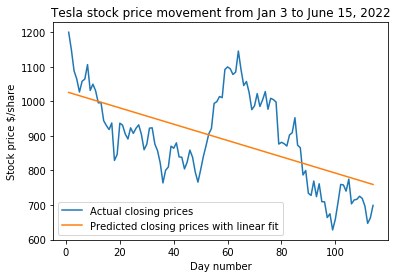

In [84]:
#plot the results
plt.plot(df["Day number"], df["Close"], label = "Actual closing prices")
plt.plot(df["Day number"], df["Close_Pred"], label = "Predicted closing prices with linear fit")
plt.legend()
plt.xlabel('Day number')
plt.ylabel('Stock price $/share')
plt.title('Tesla stock price movement from Jan 3 to June 15, 2022')
plt.show()

In [85]:
#Although the trend is not linear, there are periods in time that the price movement appears linear. 
#Let's check that out next!


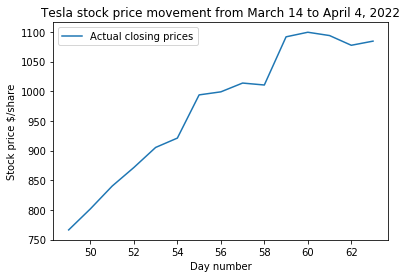

In [105]:
#Let's filter the dataset to a period which appears pretty linear in the graph above and look at the data visually 
#Days ~49-63 look pretty linear in the graph above (which correspond to the March 14 - April 1 timeframe)

df_filtered = df.loc[(df["Day number"] >= 49) & (df["Day number"] <= 63)].copy()
plt.plot(df_filtered["Day number"], df_filtered["Close"], label = "Actual closing prices")
plt.legend()
plt.xlabel('Day number')
plt.ylabel('Stock price $/share')
plt.title('Tesla stock price movement from March 14 to April 4, 2022')
plt.show()

In [106]:
#let's repeat the same steps we went through before to create a new linear regression over this period

x = df_filtered[["Day number"]]
y = df_filtered[["Close"]]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     161.9
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.03e-08
Time:                        13:28:28   Log-Likelihood:                -72.215
No. Observations:                  15   AIC:                             148.4
Df Residuals:                      13   BIC:                             149.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -392.6873    107.540     -3.652      0.0

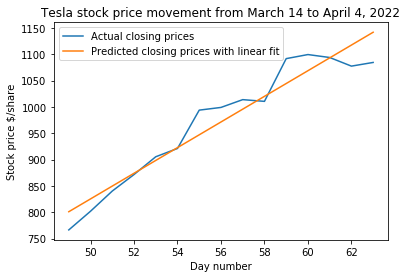

In [88]:
#Isn't that interesting! 
#The R-squared value is now 0.926 which definitely indicates a linear fit! 

#plot the results
y_pred = model.predict(x)
df_filtered["Close_Pred"] = y_pred
plt.plot(df_filtered["Day number"], df_filtered["Close"], label = "Actual closing prices")
plt.plot(df_filtered["Day number"], df_filtered["Close_Pred"], label = "Predicted closing prices with linear fit")
plt.xlabel('Day number')
plt.ylabel('Stock price $/share')
plt.title('Tesla stock price movement from March 14 to April 1, 2022')
plt.legend()
plt.show()

In [89]:
#with most datsets, be careful when only looking at part of the dataset!
#just like in this example where I show that over a period of almost a month there was a very linear trend in this dataset,
#you can find this in other datasets too
#make sure you're trying to use as much data possible (within reason) to make your predictions
#this is a great example which demonstrates short-term patterns in stock prices
#if you catch on to these soon enough, you can profit from these trends, but you need to watch closely and make sure 
#that you can recognize when the trend isn't holding any more. 